
## 📌 Segmentación semantica de imagenes Aéreas(land cover)

El dataset contiene las siguientes clases, cada una representada por un color específico en las máscaras:

1. **Water (Agua)**  
   - Color: `#50E3C2` (turquesa)  

2. **Land (Unpaved area / Tierra no pavimentada)**  
   - Color: `#F5A623` (naranja)  

3. **Road (Carretera / Calle)**  
   - Color: `#DE597F` (rosado oscuro)  

4. **Building (Edificio)**  
   - Color: `#D0021B` (rojo)  

5. **Vegetation (Vegetación / Árboles, pasto, etc.)**  
   - Color: `#417505` (verde)  

6. **Unlabeled (Sin etiqueta / Background)**  
   - Color: `#9B9B9B` (gris)  



In [3]:
import json

# --- Ruta al archivo JSON ---
ruta_json = "E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\Semantic segmentation dataset\classes.json"

# --- Leer el archivo ---
with open(ruta_json, "r", encoding="utf-8") as f:
    data = json.load(f)

# --- Mostrar estructura completa ---
print(data)

# --- Acceder a la lista de clases ---
clases = data["classes"]

# Mostrar títulos de las clases
for c in clases:
    print(f"Clase: {c['title']} - Color: {c['color']}")


{'classes': [{'title': 'Water', 'shape': 'polygon', 'color': '#50E3C2', 'geometry_config': {}}, {'title': 'Land (unpaved area)', 'shape': 'polygon', 'color': '#F5A623', 'geometry_config': {}}, {'title': 'Road', 'shape': 'polygon', 'color': '#DE597F', 'geometry_config': {}}, {'title': 'Building', 'shape': 'polygon', 'color': '#D0021B', 'geometry_config': {}}, {'title': 'Vegetation', 'shape': 'polygon', 'color': '#417505', 'geometry_config': {}}, {'title': 'Unlabeled', 'shape': 'polygon', 'color': '#9B9B9B', 'geometry_config': {}}], 'tags': []}
Clase: Water - Color: #50E3C2
Clase: Land (unpaved area) - Color: #F5A623
Clase: Road - Color: #DE597F
Clase: Building - Color: #D0021B
Clase: Vegetation - Color: #417505
Clase: Unlabeled - Color: #9B9B9B


Confirmamos que la informacion proporcionada por la pagina es la misma que contiene el archivo classes.json

Ahora bien, abriremos una imagen y su mascara para observar la forma en la que las mascaras estan desarrolladas.

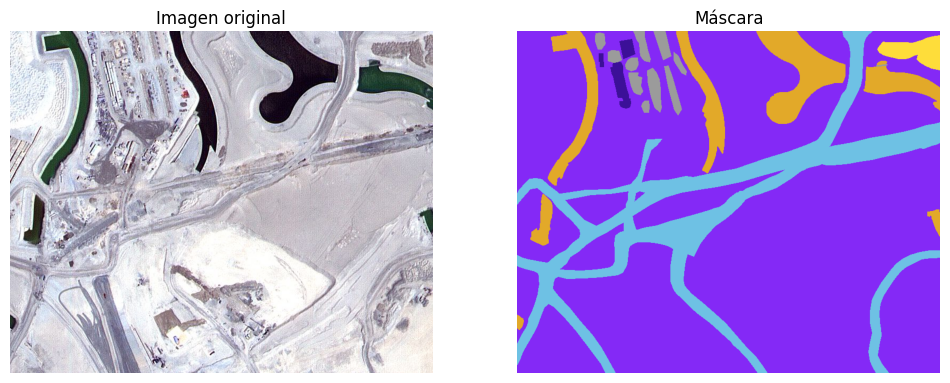

In [5]:
import cv2
import matplotlib.pyplot as plt

def mostrar_imagen_y_mascara(ruta_imagen, ruta_mascara):
    """
    Muestra una imagen y su máscara asociada lado a lado.
    
    Parámetros:
    ruta_imagen (str): Ruta de la imagen original.
    ruta_mascara (str): Ruta de la máscara correspondiente.
    """
    
    # --- Cargar la imagen ---
    img = cv2.imread(ruta_imagen)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV usa BGR -> convertimos a RGB
    
    # --- Cargar la máscara ---
    mask = cv2.imread(ruta_mascara)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    
    # --- Mostrar ---
    plt.figure(figsize=(12,6))
    
    plt.subplot(1,2,1)
    plt.title("Imagen original")
    plt.imshow(img)
    plt.axis("off")
    
    plt.subplot(1,2,2)
    plt.title("Máscara")
    plt.imshow(mask)
    plt.axis("off")
    
    plt.show()

# 🔹 Ejemplo de uso:
ruta_imagen1 = "E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\Semantic segmentation dataset\Tile 1\images\image_part_001.jpg"
ruta_mascara1= "E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\Semantic segmentation dataset\Tile 1\masks\image_part_001.png"
mostrar_imagen_y_mascara(ruta_imagen1,ruta_mascara1)


Tile 1...


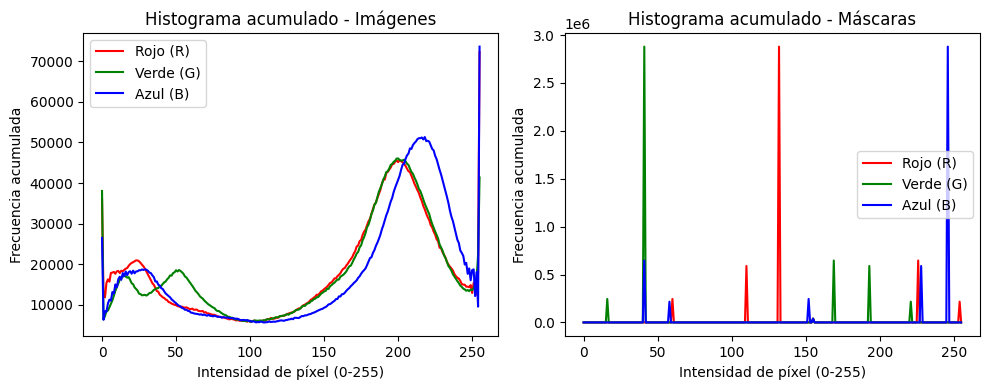

Tile 2...


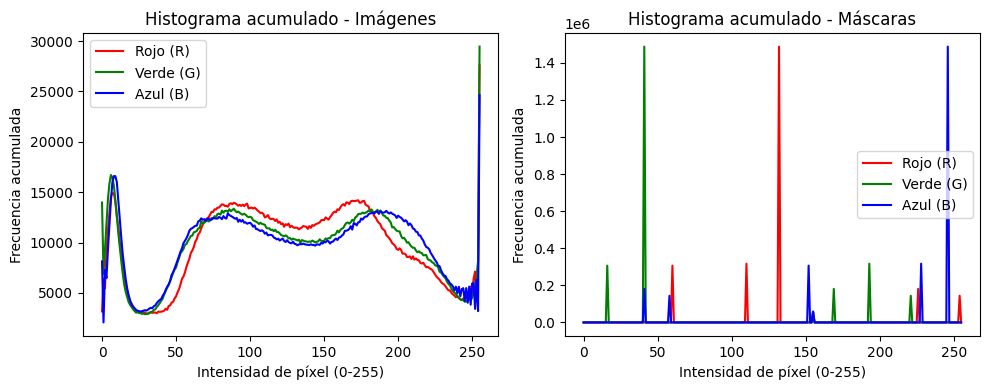

Tile 3...


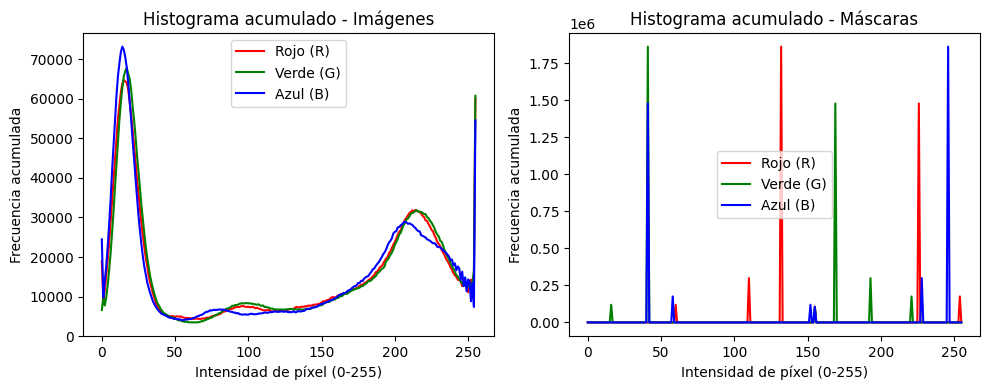

Tile 4...


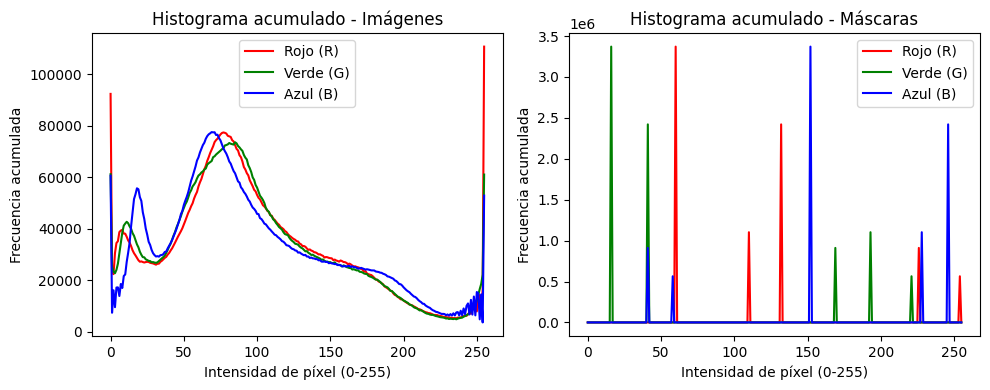

Tile 5...


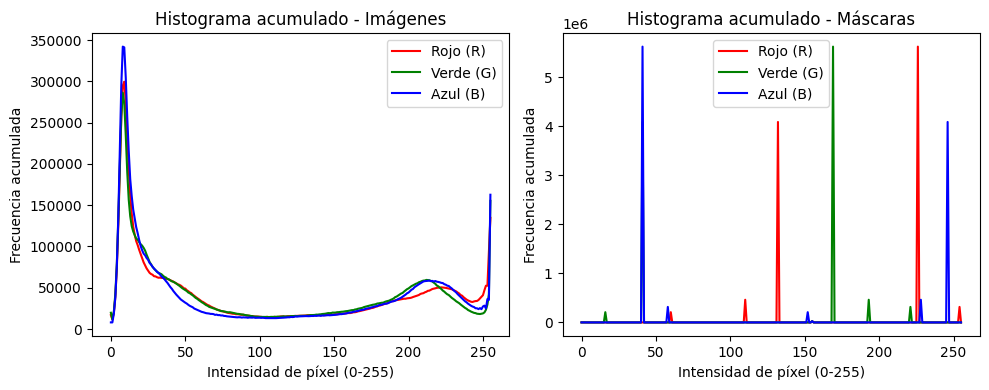

Tile 6...


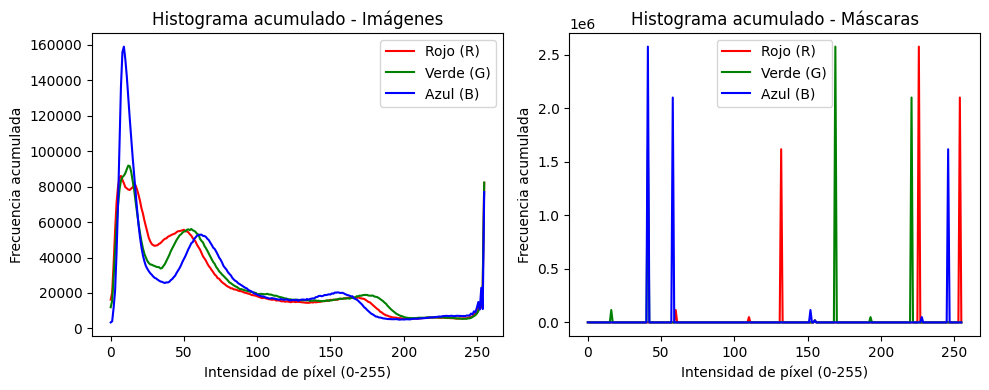

Tile 7...


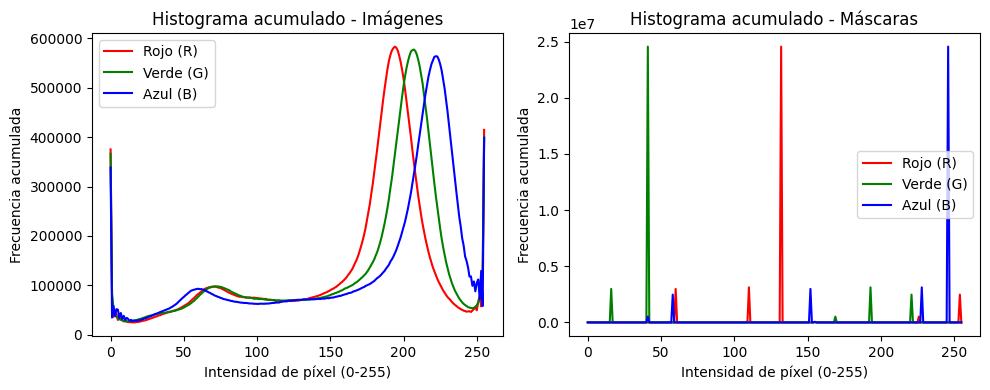

Tile 8...


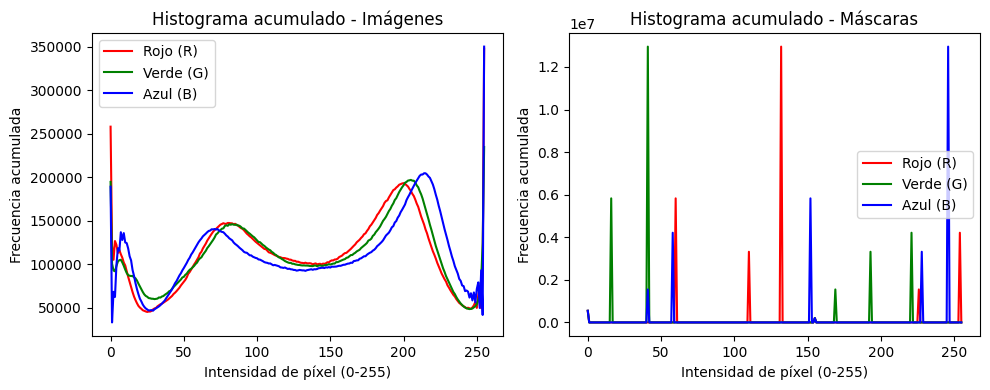

In [15]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def histograma_imagenes_y_mascaras(ruta_carpeta_imgs, ruta_carpeta_masks):
    """
    Lee todas las imágenes y máscaras de dos carpetas y genera histogramas
    de los 3 canales (R, G, B) acumulados para cada tipo.
    
    Parámetros:
    ruta_carpeta_imgs (str): Carpeta que contiene las imágenes originales.
    ruta_carpeta_masks (str): Carpeta que contiene las máscaras de segmentación.
    """
    def acumular_histogramas(ruta_carpeta):
        # Inicializar histogramas acumulados
        hist_r = np.zeros(256)
        hist_g = np.zeros(256)
        hist_b = np.zeros(256)

        for archivo in os.listdir(ruta_carpeta):
            if archivo.lower().endswith((".jpg", ".png", ".jpeg")):
                ruta_img = os.path.join(ruta_carpeta, archivo)
                
                # Leer imagen
                img = cv2.imread(ruta_img)
                if img is None:
                    continue
                
                # Convertir a RGB
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                # Calcular histogramas por canal
                hist_r += cv2.calcHist([img], [0], None, [256], [0,256]).flatten()
                hist_g += cv2.calcHist([img], [1], None, [256], [0,256]).flatten()
                hist_b += cv2.calcHist([img], [2], None, [256], [0,256]).flatten()
        
        return hist_r, hist_g, hist_b

    # --- Calcular histogramas ---
    hist_r_imgs, hist_g_imgs, hist_b_imgs = acumular_histogramas(ruta_carpeta_imgs)
    hist_r_masks, hist_g_masks, hist_b_masks = acumular_histogramas(ruta_carpeta_masks)

    # --- Mostrar plots lado a lado ---
    plt.figure(figsize=(10,4))

    # Histograma de imágenes
    plt.subplot(1,2,1)
    plt.title("Histograma acumulado - Imágenes")
    plt.plot(hist_r_imgs, color="red", label="Rojo (R)")
    plt.plot(hist_g_imgs, color="green", label="Verde (G)")
    plt.plot(hist_b_imgs, color="blue", label="Azul (B)")
    plt.xlabel("Intensidad de píxel (0-255)")
    plt.ylabel("Frecuencia acumulada")
    plt.legend()

    # Histograma de máscaras
    plt.subplot(1,2,2)
    plt.title("Histograma acumulado - Máscaras")
    plt.plot(hist_r_masks, color="red", label="Rojo (R)")
    plt.plot(hist_g_masks, color="green", label="Verde (G)")
    plt.plot(hist_b_masks, color="blue", label="Azul (B)")
    plt.xlabel("Intensidad de píxel (0-255)")
    plt.ylabel("Frecuencia acumulada")
    plt.legend()

    plt.tight_layout()
    plt.show()

# 🔹 Ejemplo de uso:
import os

# Carpeta raíz del dataset
base_path = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\Semantic segmentation dataset"

# Recorremos los 8 Tiles
for i in range(1, 9):
    carpeta_img = os.path.join(base_path, f"Tile {i}", "images")
    carpeta_mask = os.path.join(base_path, f"Tile {i}", "masks")
    
    print(f"Tile {i}")
    histograma_imagenes_y_mascaras(carpeta_img, carpeta_mask)




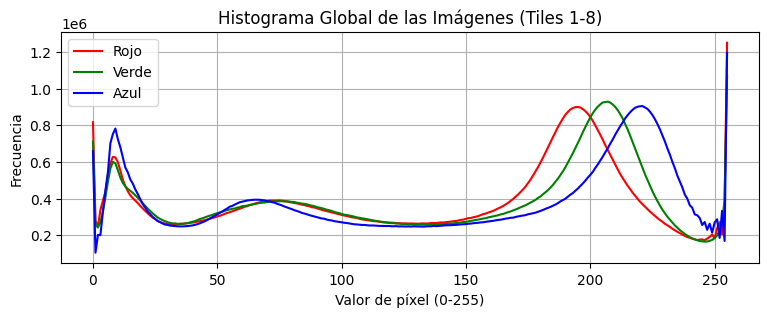

In [18]:
import numpy as np

def histograma_global_imagenes(base_path, n_tiles=8):
    # Contadores globales de histogramas para R, G y B
    hist_r_total = np.zeros(256)
    hist_g_total = np.zeros(256)
    hist_b_total = np.zeros(256)
    
    for i in range(1, n_tiles + 1):
        carpeta_img = os.path.join(base_path, f"Tile {i}", "images")
        
        # Recorremos todas las imágenes de la carpeta
        for img_name in os.listdir(carpeta_img):
            img_path = os.path.join(carpeta_img, img_name)
            img = cv2.imread(img_path)
            
            if img is None:
                continue  # saltar si no se pudo leer
            
            # Convertir de BGR (OpenCV) a RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Calcular histogramas de cada canal
            hist_r, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
            hist_g, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
            hist_b, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 256))
            
            # Sumar al acumulado global
            hist_r_total += hist_r
            hist_g_total += hist_g
            hist_b_total += hist_b
    
    # Plotear histograma global
    plt.figure(figsize=(9, 3))
    plt.plot(hist_r_total, color='red', label='Rojo')
    plt.plot(hist_g_total, color='green', label='Verde')
    plt.plot(hist_b_total, color='blue', label='Azul')
    plt.title("Histograma Global de las Imágenes (Tiles 1-8)")
    plt.xlabel("Valor de píxel (0-255)")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()

# ---------------------------
# Uso
# ---------------------------
base_path = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\Semantic segmentation dataset"
histograma_global_imagenes(base_path, n_tiles=8)


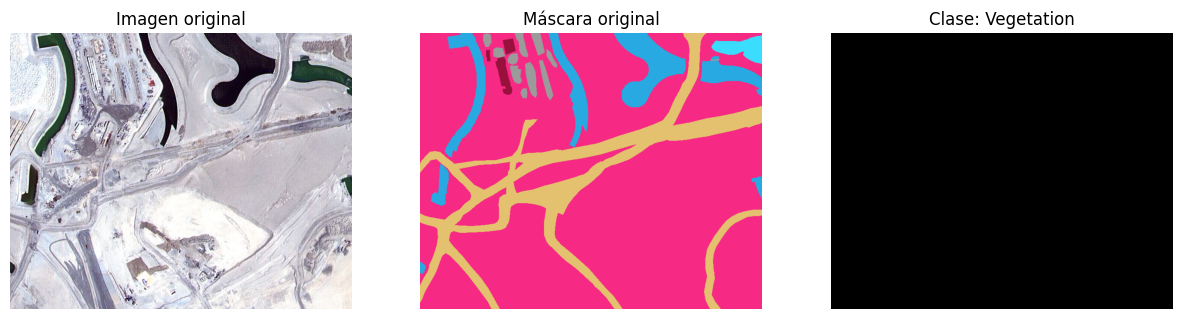

Colores únicos en la máscara: [[ 41 169 226]
 [ 58 221 254]
 [152  16  60]
 [155 155 155]
 [228 193 110]
 [246  41 132]]
Cantidad: 6


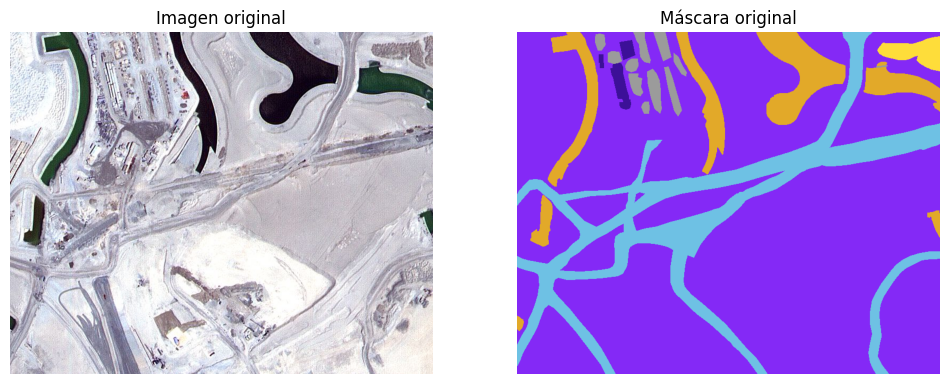

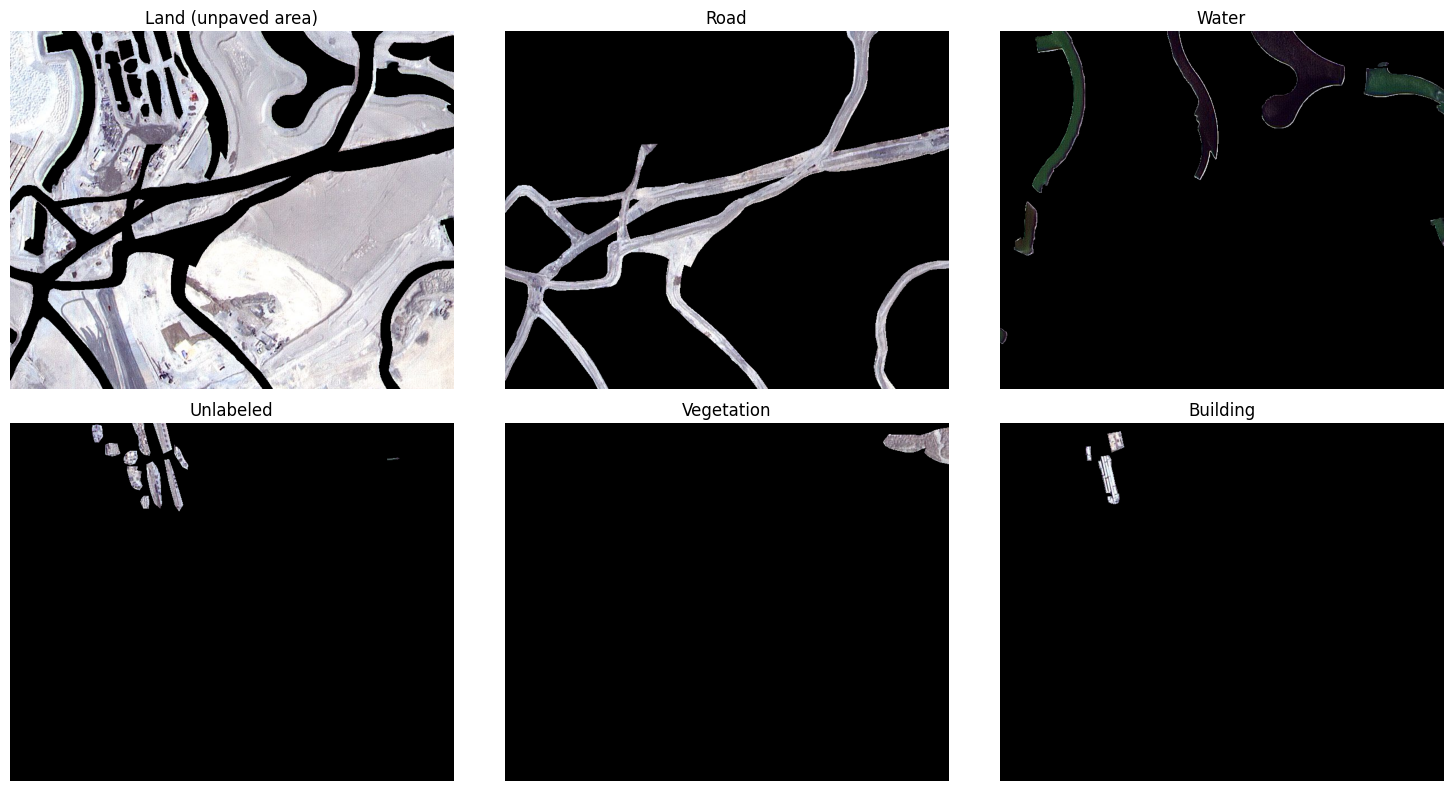

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- RUTAS: ajusta a tus archivos ---
ruta_imagen = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\Semantic segmentation dataset\Tile 1\images\image_part_001.jpg"
ruta_mask = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\Semantic segmentation dataset\Tile 1\masks\image_part_001.png"
# --- Diccionario de colores reales (BGR) ---
color_clases_reales = {
    "Land (unpaved area)": (246, 41, 132),   # rosa
    "Road": (228, 193, 110),                 # beige
    "Water": (41, 169, 226),                 # azul
    "Unlabeled": (155, 155, 155),            # gris
    "Vegetation": (58, 221, 254),            # celeste verdoso
    "Building": (152, 16, 60)                # rojo oscuro
}

# --- Leer ---
img_bgr = cv2.imread(ruta_imagen)
mask_bgr = cv2.imread(ruta_mask)

if img_bgr is None or mask_bgr is None:
    raise FileNotFoundError("Revisa las rutas de imagen o máscara.")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# --- Mostrar imagen original y máscara ---
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Imagen original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)); plt.title("Máscara original"); plt.axis("off")
plt.show()

# --- Mostrar cada clase ---
n = len(color_clases_reales)
cols = 3
rows = int(np.ceil(n / cols))

plt.figure(figsize=(15, rows * 4))

for i, (nombre, bgr) in enumerate(color_clases_reales.items()):
    b, g, r = bgr
    mask_bool = np.all(mask_bgr == (b,g,r), axis=-1)

    masked_img = np.zeros_like(img_rgb)
    masked_img[mask_bool] = img_rgb[mask_bool]

    ax = plt.subplot(rows, cols, i+1)
    ax.imshow(masked_img)
    ax.set_title(f"{nombre}", fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.show()


Ahora buscaremos clasificar cada clase por carpeta para estudiar el comportamiento especifico de cada segmentacion.

In [36]:
import cv2
import numpy as np
import os
from tqdm import tqdm

# --- Rutas ---
ruta_dataset = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\Semantic segmentation dataset"
ruta_salida = os.path.join(ruta_dataset, "clases_segmentadas")
os.makedirs(ruta_salida, exist_ok=True)

# --- Diccionario de colores reales (BGR) ---
color_clases_reales = {
    "Land_unpaved": (246, 41, 132),   # rosa
    "Road": (228, 193, 110),          # beige
    "Water": (41, 169, 226),          # azul
    "Unlabeled": (155, 155, 155),     # gris
    "Vegetation": (58, 221, 254),     # celeste verdoso
    "Building": (152, 16, 60)         # rojo oscuro
}

# Crear carpetas para cada clase
for clase in color_clases_reales.keys():
    os.makedirs(os.path.join(ruta_salida, clase), exist_ok=True)

# --- Recorrer Tiles ---
tiles = [d for d in os.listdir(ruta_dataset) if d.startswith("Tile")]

for tile in tqdm(tiles, desc="Procesando Tiles"):
    ruta_tile = os.path.join(ruta_dataset, tile)
    ruta_imgs = os.path.join(ruta_tile, "images")
    ruta_masks = os.path.join(ruta_tile, "masks")

    imagenes = sorted(os.listdir(ruta_imgs))
    mascaras = sorted(os.listdir(ruta_masks))

    for img_name, mask_name in zip(imagenes, mascaras):
        ruta_img = os.path.join(ruta_imgs, img_name)
        ruta_mask = os.path.join(ruta_masks, mask_name)

        # Leer imagen y máscara
        img_bgr = cv2.imread(ruta_img)
        mask_bgr = cv2.imread(ruta_mask)

        if img_bgr is None or mask_bgr is None:
            print(f"⚠️ Error al leer {img_name} o {mask_name}")
            continue

        # --- Para cada clase, generar máscara y guardar ---
        for clase, bgr in color_clases_reales.items():
            b, g, r = bgr
            mask_bool = np.all(mask_bgr == (b,g,r), axis=-1)

            # Crear imagen segmentada
            seg_img = np.zeros_like(img_bgr)
            seg_img[mask_bool] = img_bgr[mask_bool]

            # Guardar
            salida_path = os.path.join(ruta_salida, clase, f"{tile}_{img_name}")
            cv2.imwrite(salida_path, seg_img)


Procesando Tiles: 100%|██████████| 8/8 [00:27<00:00,  3.48s/it]
